In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv("ETH-USD.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,136.836243,138.995270,136.434784,136.443619,136.443619,3756124824
1,2019-03-02,136.350082,137.184799,132.436386,134.206955,134.206955,3747176425
2,2019-03-03,134.786118,135.849289,131.328857,132.249420,132.249420,3454374053
3,2019-03-04,132.157883,132.729141,125.402702,127.774124,127.774124,4008171341
4,2019-03-05,127.792953,138.229980,126.735298,137.822388,137.822388,4764849990
...,...,...,...,...,...,...,...
1823,2024-02-26,3112.529053,3197.375000,3037.954590,3178.993652,3178.993652,17504464351
1824,2024-02-27,3178.405029,3287.958008,3167.830566,3244.519287,3244.519287,21090315368
1825,2024-02-28,3243.893311,3485.450928,3201.575928,3385.703857,3385.703857,32885894265
1826,2024-02-29,3386.802734,3518.969238,3303.905273,3341.919678,3341.919678,28469171094


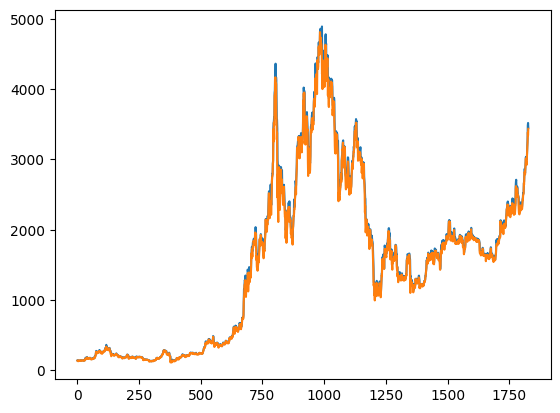

In [3]:
y = df[["Close"]]
X= df[["High"]]
plt.plot(X)
plt.plot(y)
plt.show()

<h1>Tỉ lệ Train Test 7:3

In [4]:
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

y_train = y[:train_size]
X_train = X[:train_size]
y_test = y[train_size:]
X_test = X[train_size:]

In [5]:
model = XGBRegressor(objective='reg:squarederror', n_estimators=700,colsample_bytree=0.5, learning_rate=0.05, max_depth=3)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=700, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [6]:
y_pred = model.predict(X_test)
y_pred = y_pred.reshape(-1,1)

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import math

mape = mean_absolute_percentage_error(y_test, y_pred)*100
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MAPE:", mape)
print("MSE: ", mse)
print("RMSE:", rmse)
print("R_Square: ", r2)

MAPE: 2.444208161950936
MSE:  2652.215903981675
RMSE: 51.49966896963198
R_Square:  0.9834783147001472


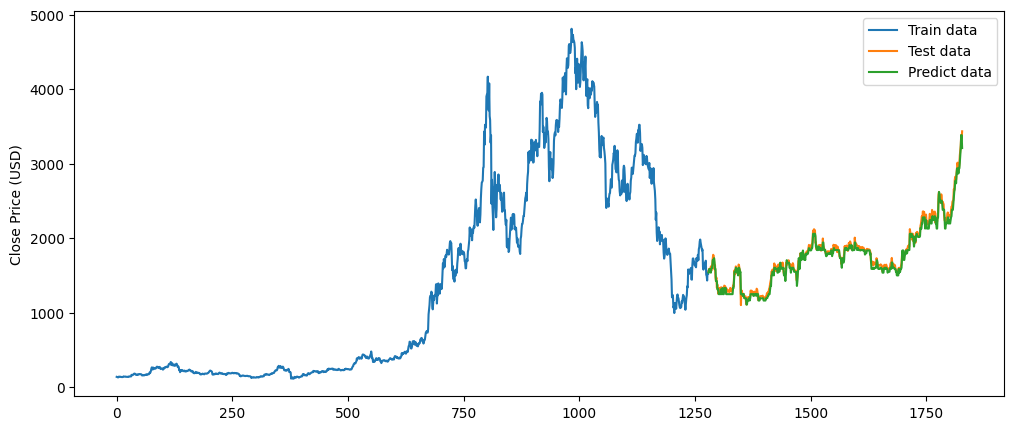

In [8]:
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(X_test.index, y_pred, label='Predict data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

In [9]:
last_row = df.tail(1)
last_data = (last_row['High']).values.reshape(-1,1)
last_data

array([[3452.626221]])

In [10]:
x_next_30_day = []

for i in range(30):
    x_pred_next = model.predict(last_data)
    x_next_30_day.append(x_pred_next)
    last_data = (x_pred_next).reshape(-1,1)

x_next_30_day

[array([3210.0225], dtype=float32),
 array([3117.4011], dtype=float32),
 array([3017.8992], dtype=float32),
 array([2935.9336], dtype=float32),
 array([2864.2139], dtype=float32),
 array([2768.7332], dtype=float32),
 array([2658.8816], dtype=float32),
 array([2548.5942], dtype=float32),
 array([2475.8228], dtype=float32),
 array([2382.6985], dtype=float32),
 array([2277.576], dtype=float32),
 array([2195.948], dtype=float32),
 array([2137.507], dtype=float32),
 array([2057.8], dtype=float32),
 array([2015.2026], dtype=float32),
 array([1941.0917], dtype=float32),
 array([1866.5365], dtype=float32),
 array([1833.706], dtype=float32),
 array([1795.8328], dtype=float32),
 array([1706.507], dtype=float32),
 array([1670.272], dtype=float32),
 array([1601.7921], dtype=float32),
 array([1535.7843], dtype=float32),
 array([1423.9066], dtype=float32),
 array([1357.7224], dtype=float32),
 array([1328.5808], dtype=float32),
 array([1247.3833], dtype=float32),
 array([1195.0009], dtype=float32),
 

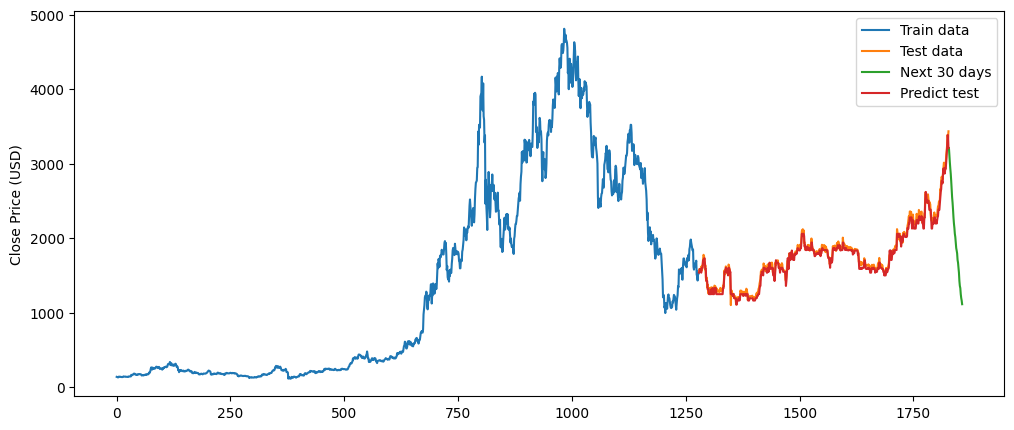

In [11]:
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+30),x_next_30_day, label='Next 30 days')
plt.plot(X_test.index, y_pred, label='Predict test')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

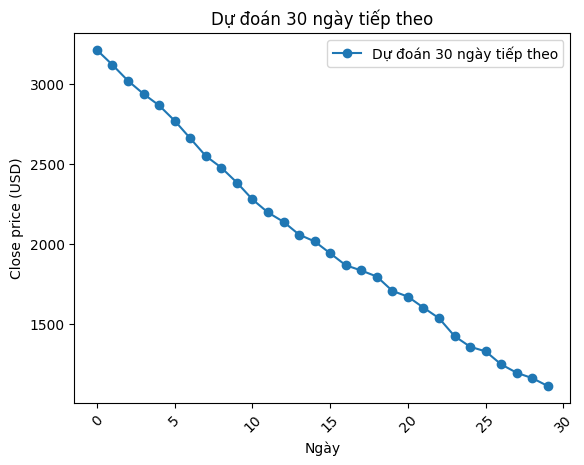

In [12]:
plt.plot(x_next_30_day, marker='o', label='Dự đoán 30 ngày tiếp theo')

plt.title('Dự đoán 30 ngày tiếp theo')
plt.xlabel('Ngày')
plt.ylabel('Close price (USD)')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [13]:
last_row = df.tail(1)
last_data = (last_row['High']).values.reshape(-1,1)
last_data

array([[3452.626221]])

In [14]:
x_next_60_day = []

for i in range(60):
    x_pred_next = model.predict(last_data)
    x_next_60_day.append(x_pred_next)
    last_data = (x_pred_next).reshape(-1,1)

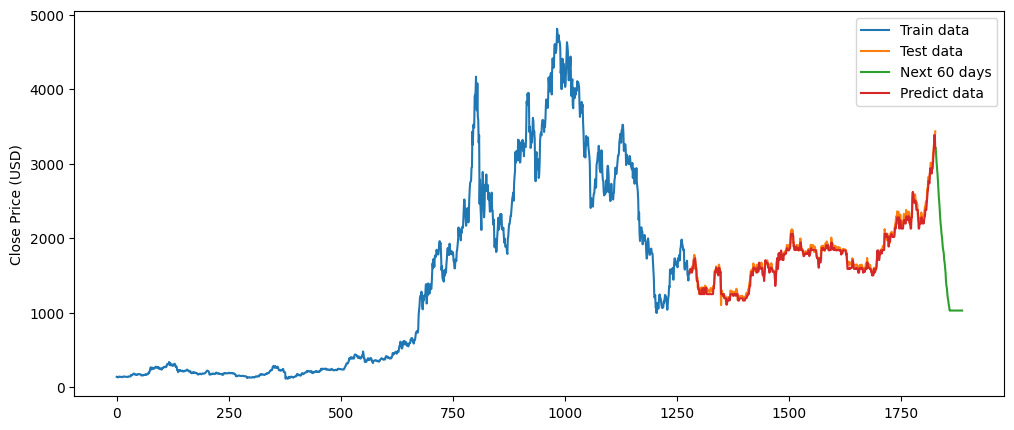

In [15]:
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+60),x_next_60_day, label='Next 60 days')
plt.plot(X_test.index, y_pred, label='Predict data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

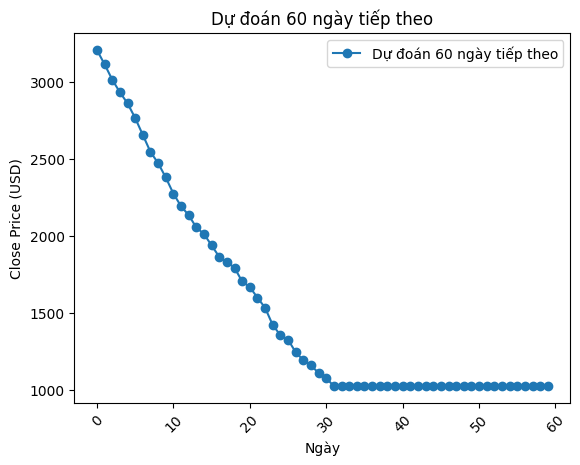

In [16]:
plt.plot(x_next_60_day, marker='o', label='Dự đoán 60 ngày tiếp theo')

plt.title('Dự đoán 60 ngày tiếp theo')
plt.xlabel('Ngày')
plt.ylabel('Close Price (USD)')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [17]:
last_row = df.tail(1)
last_data = (last_row['High']).values.reshape(-1,1)
last_data

array([[3452.626221]])

In [18]:
x_next_90_day = []

for i in range(90):
    x_pred_next = model.predict(last_data)
    x_next_90_day.append(x_pred_next)
    last_data = (x_pred_next).reshape(-1,1)

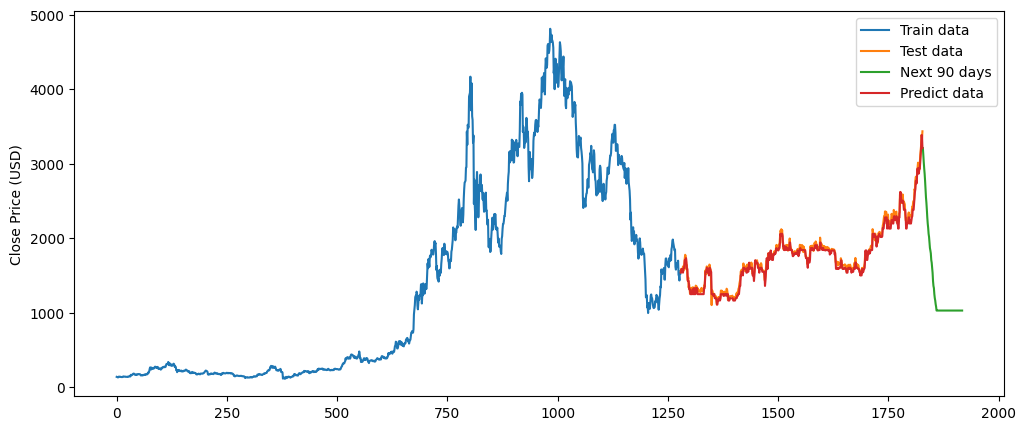

In [19]:
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+90),x_next_90_day, label='Next 90 days')
plt.plot(X_test.index, y_pred, label='Predict data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

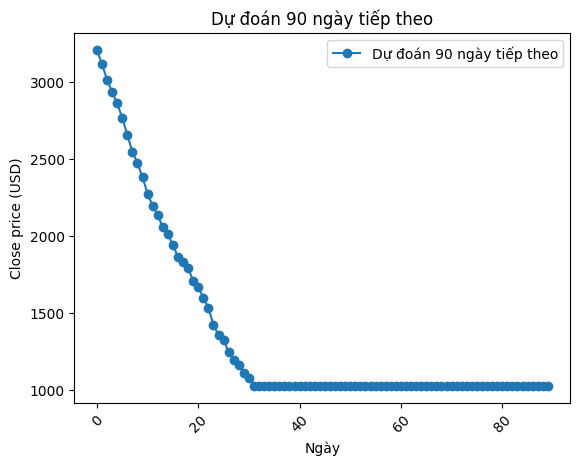

In [20]:
plt.plot(x_next_90_day, marker='o', label='Dự đoán 90 ngày tiếp theo')

plt.title('Dự đoán 90 ngày tiếp theo')
plt.xlabel('Ngày')
plt.ylabel('Close price (USD)')
plt.xticks(rotation=45)
plt.legend()

plt.show()

<h1>Tỉ lệ train test 8:2

In [21]:
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

y_train = y[:train_size]
X_train = X[:train_size]
y_test = y[train_size:]
X_test = X[train_size:]

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=700, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [22]:
y_pred = model.predict(X_test)
y_pred = y_pred.reshape(-1,1)

In [23]:
mape = mean_absolute_percentage_error(y_test, y_pred)*100
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MAPE:", mape)
print("MSE: ", mse)
print("RMSE:", rmse)
print("R_Square: ", r2)

MAPE: 2.0273871902387524
MSE:  2390.1151839976574
RMSE: 48.88880428071091
R_Square:  0.9805574852631319


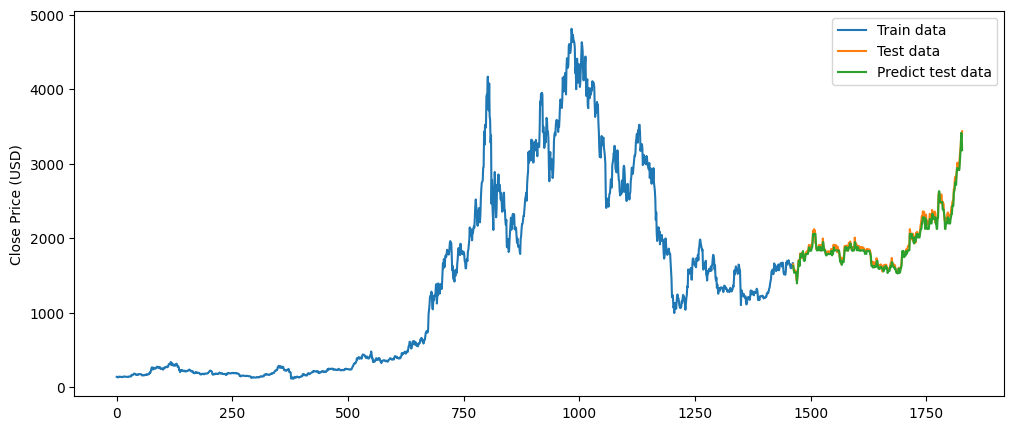

In [24]:
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(X_test.index, y_pred, label='Predict test data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

In [25]:
last_row = df.tail(1)
last_data = (last_row['High']).values.reshape(-1,1)
last_data

array([[3452.626221]])

In [26]:
x_next_30_day = []

for i in range(30):
    x_pred_next = model.predict(last_data)
    x_next_30_day.append(x_pred_next)
    last_data = (x_pred_next).reshape(-1,1)

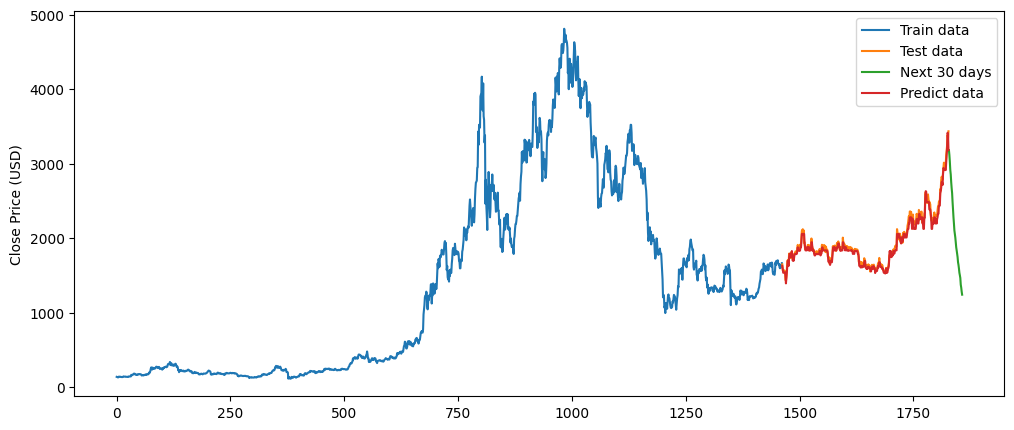

In [27]:
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+30),x_next_30_day, label='Next 30 days')
plt.plot(X_test.index, y_pred, label='Predict data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

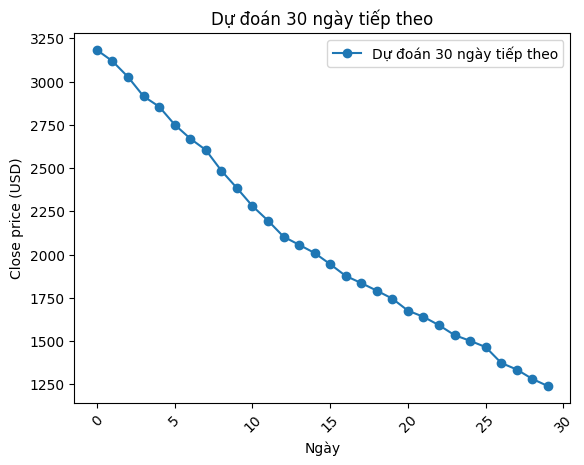

In [28]:
plt.plot(x_next_30_day, marker='o', label='Dự đoán 30 ngày tiếp theo')

plt.title('Dự đoán 30 ngày tiếp theo')
plt.xlabel('Ngày')
plt.ylabel('Close price (USD)')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [29]:
last_row = df.tail(1)
last_data = (last_row['High']).values.reshape(-1,1)
last_data

array([[3452.626221]])

In [30]:
x_next_60_day = []

for i in range(60):
    x_pred_next = model.predict(last_data)
    x_next_60_day.append(x_pred_next)
    last_data = (x_pred_next).reshape(-1,1)

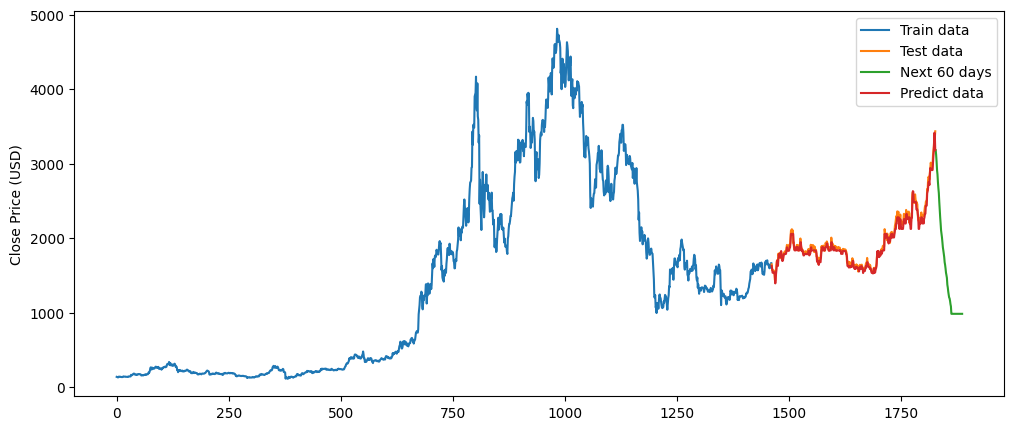

In [31]:
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+60),x_next_60_day, label='Next 60 days')
plt.plot(X_test.index, y_pred, label='Predict data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

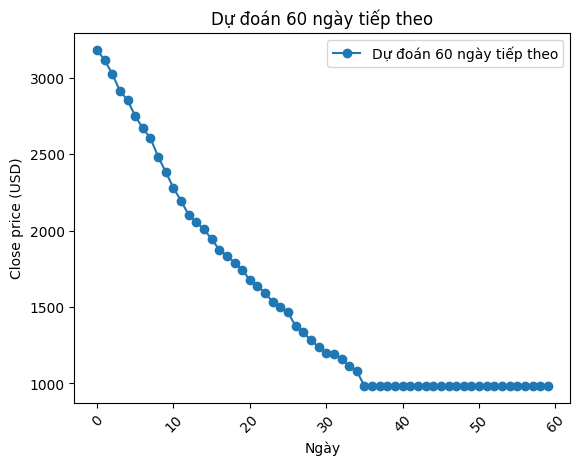

In [32]:
plt.plot(x_next_60_day, marker='o', label='Dự đoán 60 ngày tiếp theo')

plt.title('Dự đoán 60 ngày tiếp theo')
plt.xlabel('Ngày')
plt.ylabel('Close price (USD)')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [33]:
last_row = df.tail(1)
last_data = (last_row['High']).values.reshape(-1,1)
last_data

array([[3452.626221]])

In [34]:
x_next_90_day = []

for i in range(90):
    x_pred_next = model.predict(last_data)
    x_next_90_day.append(x_pred_next)
    last_data = (x_pred_next).reshape(-1,1)

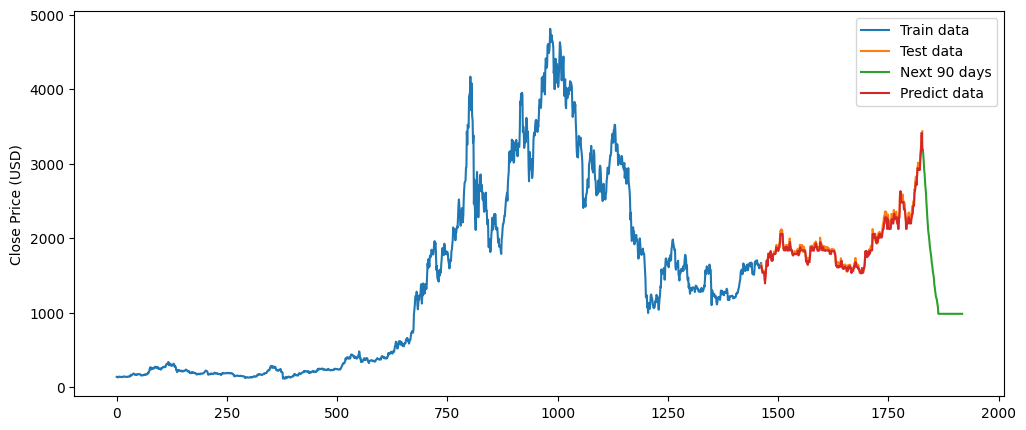

In [35]:
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+90),x_next_90_day, label='Next 90 days')
plt.plot(X_test.index, y_pred, label='Predict data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

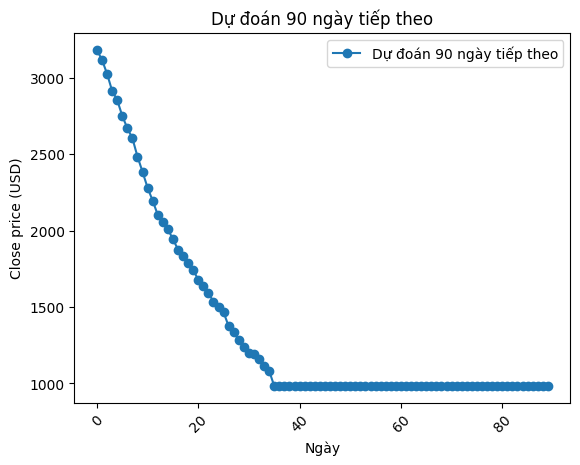

In [36]:
plt.plot(x_next_90_day, marker='o', label='Dự đoán 90 ngày tiếp theo')

plt.title('Dự đoán 90 ngày tiếp theo')
plt.xlabel('Ngày')
plt.ylabel('Close price (USD)')
plt.xticks(rotation=45)
plt.legend()

plt.show()

<h1>Tỉ lệ 9:1

In [37]:
train_size = int(0.9 * len(df))
test_size = len(df) - train_size

y_train = y[:train_size]
X_train = X[:train_size]
y_test = y[train_size:]
X_test = X[train_size:]

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=700, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [38]:
y_pred = model.predict(X_test)
y_pred = y_pred.reshape(-1,1)

In [39]:
mape = mean_absolute_percentage_error(y_test, y_pred)*100
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MAPE:", mape)
print("MSE: ", mse)
print("RMSE:", rmse)
print("R_Square: ", r2)

MAPE: 2.218444373111898
MSE:  3645.7511414830246
RMSE: 60.38005582543813
R_Square:  0.9807573535731562


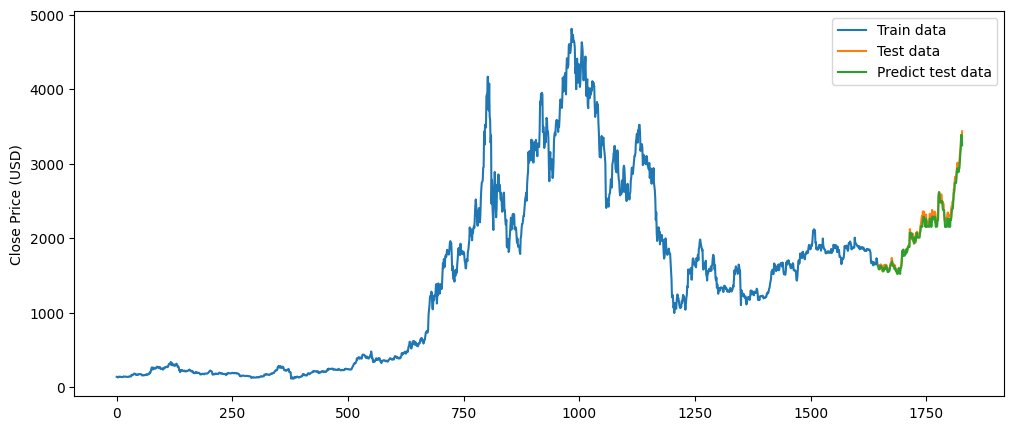

In [40]:
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(X_test.index, y_pred, label='Predict test data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

In [41]:
last_row = df.tail(1)
last_data = (last_row['High']).values.reshape(-1,1)
last_data

array([[3452.626221]])

In [42]:
x_next_30_day = []

for i in range(30):
    x_pred_next = model.predict(last_data)
    x_next_30_day.append(x_pred_next)
    last_data = (x_pred_next).reshape(-1,1)

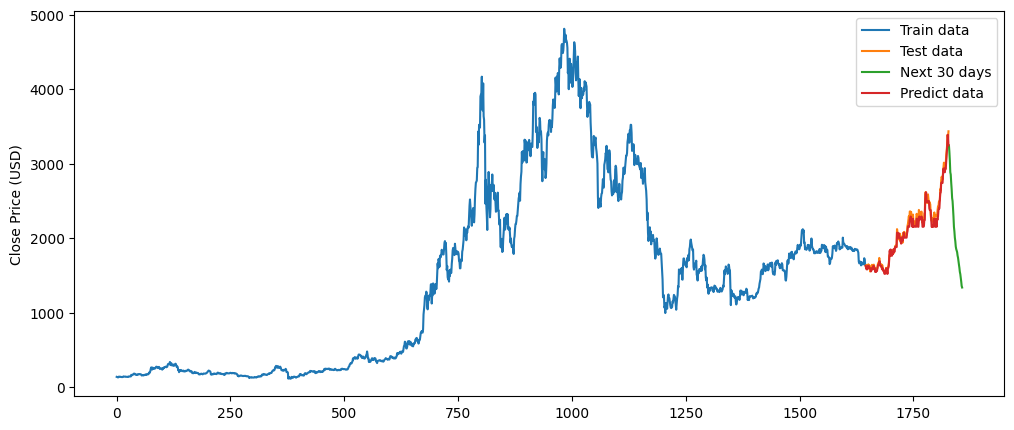

In [43]:
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+30), x_next_30_day, label='Next 30 days')
plt.plot(X_test.index, y_pred, label='Predict data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

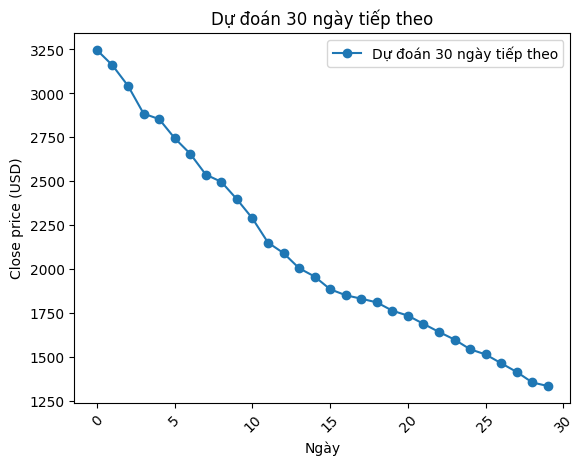

In [44]:
plt.plot(x_next_30_day, marker='o', label='Dự đoán 30 ngày tiếp theo')

plt.title('Dự đoán 30 ngày tiếp theo')
plt.xlabel('Ngày')
plt.ylabel('Close price (USD)')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [45]:
last_row = df.tail(1)
last_data = (last_row['High']).values.reshape(-1,1)
last_data

array([[3452.626221]])

In [46]:
x_next_60_day = []

for i in range(60):
    x_pred_next = model.predict(last_data)
    x_next_60_day.append(x_pred_next)
    last_data = (x_pred_next).reshape(-1,1)

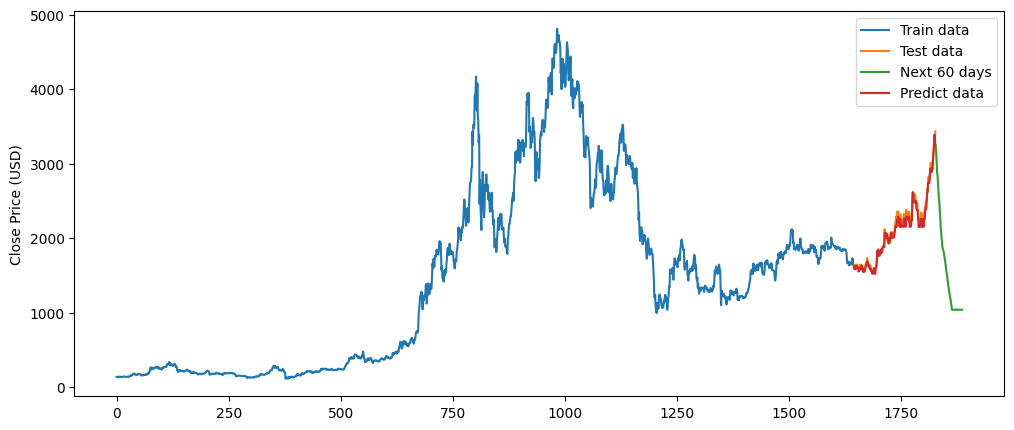

In [47]:
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+60),x_next_60_day, label='Next 60 days')
plt.plot(X_test.index, y_pred, label='Predict data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

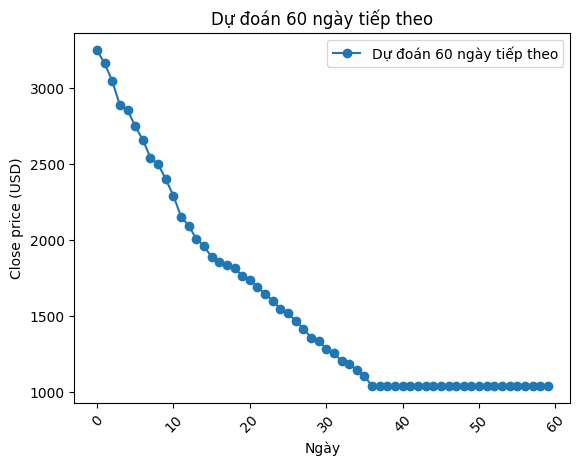

In [48]:
plt.plot(x_next_60_day, marker='o', label='Dự đoán 60 ngày tiếp theo')

plt.title('Dự đoán 60 ngày tiếp theo')
plt.xlabel('Ngày')
plt.ylabel('Close price (USD)')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [49]:
last_row = df.tail(1)
last_data = (last_row['High']).values.reshape(-1,1)
last_data

array([[3452.626221]])

In [50]:
x_next_90_day = []

for i in range(90):
    x_pred_next = model.predict(last_data)
    x_next_90_day.append(x_pred_next)
    last_data = (x_pred_next).reshape(-1,1)

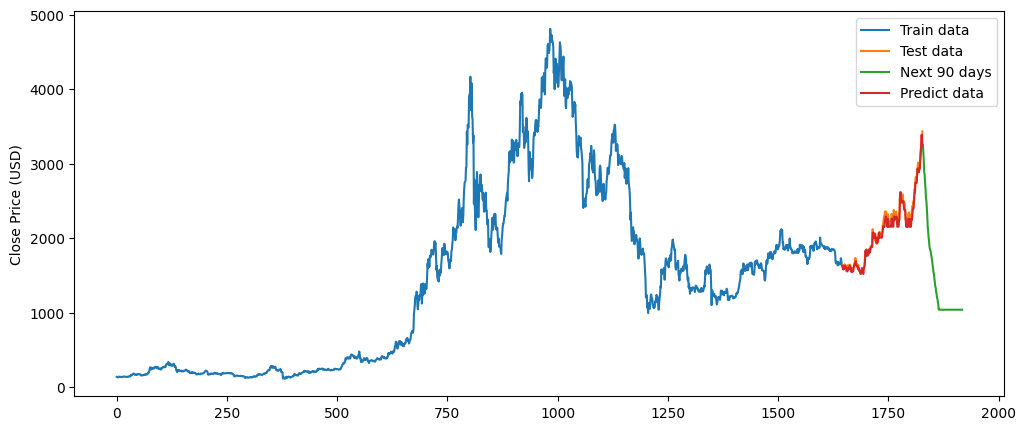

In [51]:
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+90),x_next_90_day, label='Next 90 days')
plt.plot(X_test.index, y_pred, label='Predict data')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

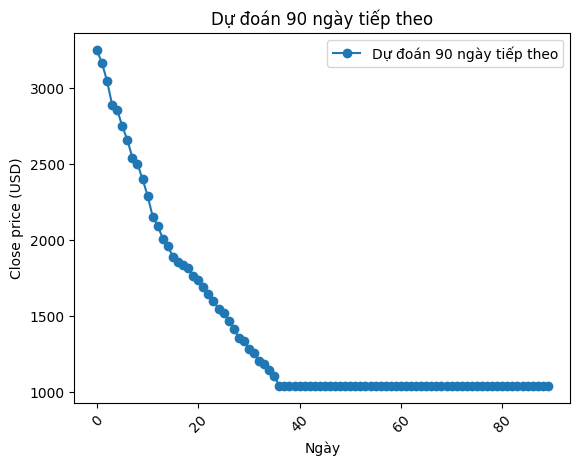

In [52]:
plt.plot(x_next_90_day, marker='o', label='Dự đoán 90 ngày tiếp theo')

plt.title('Dự đoán 90 ngày tiếp theo')
plt.xlabel('Ngày')
plt.ylabel('Close price (USD)')
plt.xticks(rotation=45)
plt.legend()

plt.show()